Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,chi2_contingency,ttest_ind,kruskal

Loading and Inspecting the DataSet

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


The dataset allows us to understand the distribution and interrelationships of important variables such as age, gender, BMI, number of children, smoking, region and insurance costs. These analyses are particularly useful in identifying factors affecting insurance costs and understanding demographic data.

## Impact of Data on Insurance Costs

##### Charges-Age

In [6]:
#calculation of covariance
covariance= np.cov(df["age"],df["charges"])
covariance

array([[1.97401387e+02, 5.08748023e+04],
       [5.08748023e+04, 1.46652372e+08]])

Variance of Age (197.401387): The variance of the age variable indicates that ages vary over a wide range.

Variance of Insurance Costs (146652372): The variance of insurance costs is quite high, indicating that insurance costs vary over a wide range.

Covariance (50874.8023): A positive covariance value indicates that age and insurance costs tend to increase together. We can say that insurance costs tend to increase as age increases.

In [7]:
#calculation of correlation
corr,p_value = pearsonr(df["age"],df["charges"])

print("Correlation Coefficient:",corr)
print("P-value:",p_value)

Correlation Coefficient: 0.2990081933306476
P-value: 4.886693331718663e-29


Correlation Coefficient: This correlation coefficient indicates a positive relationship between age and insurance costs (charges). A value close to 0.3 indicates a moderate relationship. In other words, we can say that insurance costs tend to increase as age increases.

p-Value: The p-value is much smaller than 0.05, very close to zero. This indicates that the correlation between age and insurance costs is highly statistically significant.

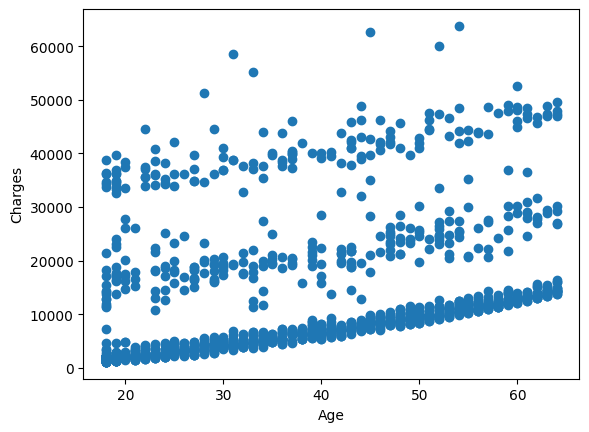

In [8]:
#visualization of age-charges columns
plt.scatter(x=df["age"],y=df["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Statistically corresponds to the data found. Insurance costs tend to increase with increasing age.

##### Charges-Gender

In [9]:
df.groupby("sex")["charges"].agg(["mean","median","min","max"]).reset_index()

,sex,mean,median,min,max
0,female,12569.578844,9412.96250,1607.5101,63770.42801
1,male,13956.751178,9369.61575,1121.8739,62592.87309


The mean insurance cost for men (13,956.75) is higher than for women (12,569.58).

The median insurance cost for women (9,412.96) is very close to that of men (9,369.62). This indicates that the median costs between the two genders are quite similar.

The minimum and maximum insurance costs between women and men vary within similar ranges. However, the maximum costs for both genders are quite high.

In [10]:
male = df[df["sex"] == "male"]["charges"]
female = df[df["sex"] == "female"]["charges"]

t_stats,p_value = ttest_ind(male,female)

print(t_stats)
print(p_value)

2.097546590051688
0.03613272100592976


The t-value indicates the magnitude of the difference between the two group means. A t-value of 2.0975 indicates that there is a significant difference in the insurance premiums of men and women.
Since the t-value is positive, we can infer that men's insurance premiums are on average higher than women's (as we observe from the means).

Since the p-value is less than 0.05 (p < 0.05), this difference is statistically significant.This result shows that the difference between the average insurance premiums of men and women is not just due to coincidence, but that there is indeed a significant difference between them.


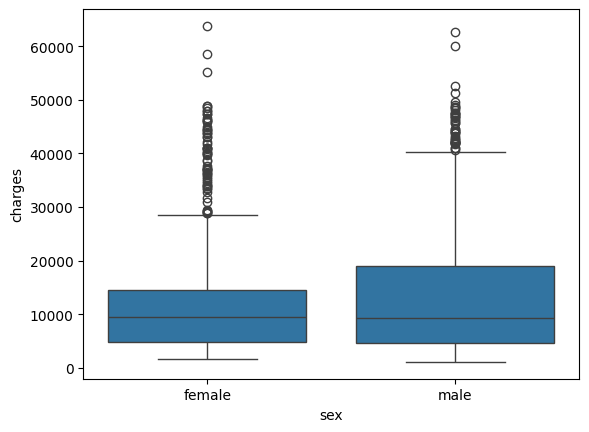

In [11]:
sns.boxplot(data=df,x="sex",y="charges")
plt.show()

This box plot shows that men have higher averages for insurance premiums and that some individuals have very high premiums. The closeness of the medians and the large number of outliers in the male group support that some of the difference in the mean is due to these outliers.

##### Charges-Children

In [12]:
#calculation of covariance
covariance = np.cov(df["children"],df["charges"])
covariance

array([[1.45321275e+00, 9.92674197e+02],
       [9.92674197e+02, 1.46652372e+08]])

Variance of the Number of Children (1.453): The variance of the number of children is quite low, indicating that the number of children does not vary much in the data.

Variance of Insurance Costs (146652372): The variance of insurance costs is quite high, indicating that insurance costs vary over a wide range in the data.

Covariance (992.674): A positive covariance value indicates that the number of children and insurance costs tend to increase together, but this relationship can be quite weak

In [13]:
#calculation of correlation
corr,p_value = pearsonr(df["children"],df["charges"])
print("Correlation Coefficient:",corr)
print("p-value:",p_value)

Correlation Coefficient: 0.06799822684790482
p-value: 0.01285212852013638


Correlation Coefficient: This value is very low and close to 0. This indicates a very weak positive correlation between the number of children and insurance costs. That is, an increase in the number of children has little effect on insurance costs. A positive value might suggest that insurance costs might increase slightly with an increase in the number of children, but this relationship is quite weak and can be practically neglected.

p-value: This value is less than 0.05, which indicates that the correlation coefficient is statistically significant. However, statistical significance is not the same as practical significance. That is, although the relationship between the number of children and insurance costs is statistically significant, the strength of this relationship is rather weak.

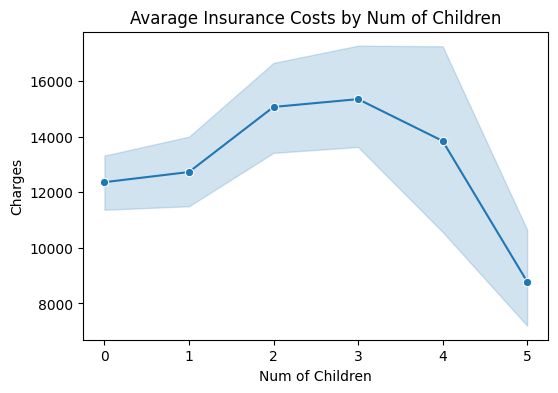

In [14]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='children', y='charges', data=df, marker='o')
plt.xlabel('Num of Children')
plt.ylabel('Charges')
plt.title('Avarage Insurance Costs by Num of Children')
plt.show()

##### Charges-Smoker

In [15]:
df.groupby("smoker")["charges"].agg(["mean","median","min","max"]).reset_index()

,smoker,mean,median,min,max
0,no,8434.268298,7345.40530,1121.8739,36910.60803
1,yes,32050.231832,34456.34845,12829.4551,63770.42801


In [16]:
smoker = df[df["smoker"] == "yes"]["charges"]
non_smoker = df[df["smoker"] == "no"]["charges"]

t_stat,p_value = ttest_ind(smoker,non_smoker)

print("t-Statistic:",t_stat)
print("p-value:",p_value)

t-Statistic: 46.66492117272371
p-value: 8.271435842179102e-283


t-Statistic: 46.66, which is quite high. This indicates that the difference between the two groups is large and that the insurance costs of smokers are quite different from those of non-smokers.

p-value: An extremely low p-value of 8.27e-283. This is a very strong indicator of statistical significance. The result is well below 0.05, indicating that there is a very strong relationship between smoking status and insurance costs.

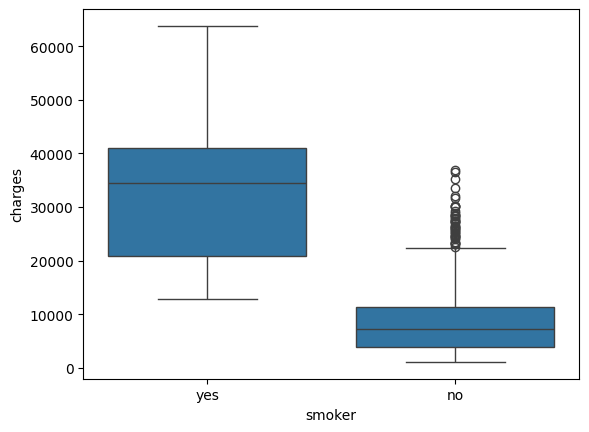

In [17]:
sns.boxplot(data=df,x="smoker",y="charges")
plt.show()

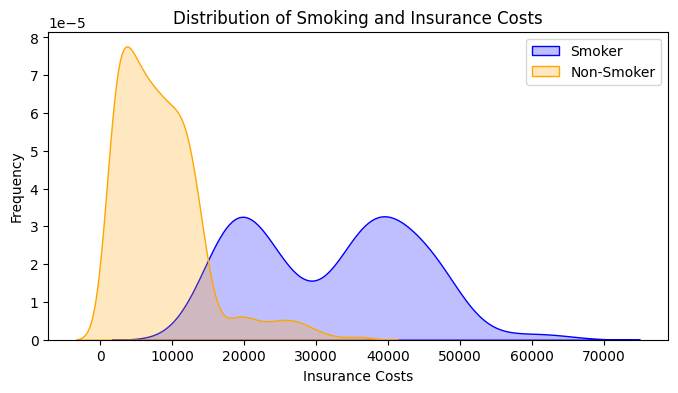

In [18]:
plt.figure(figsize=(8, 4))
sns.kdeplot(smoker, fill=True, label='Smoker', color='blue')
sns.kdeplot(non_smoker, fill=True, label='Non-Smoker', color='orange')
plt.title('Distribution of Smoking and Insurance Costs')
plt.xlabel('Insurance Costs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 The graphs correspond to the statistical results

##### Charges-Region

In [19]:
df.groupby("region")["charges"].agg(["mean","median","min","max"]).reset_index()

,region,mean,median,min,max
0,northeast,13406.384516,10057.652025,1694.7964,58571.07448
1,northwest,12417.575374,8965.795750,1621.3402,60021.39897
2,southeast,14735.411438,9294.131950,1121.8739,63770.42801
3,southwest,12346.937377,8798.593000,1241.5650,52590.82939


In [20]:
#Kruskal-Wallis Test
northeast = df[df['region'] == 'northeast']['charges'] 
northwest = df[df['region'] == 'northwest']['charges'] 
southeast = df[df['region'] == 'southeast']['charges'] 
southwest = df[df['region'] == 'southwest']["charges"]

h_stat,p_value = kruskal(northeast,northwest,southeast,southwest)

print("H-Statistic:",h_stat)
print("p-value:",p_value)

H-Statistic: 4.734181215658743
p-value: 0.19232908072121002


H-Statistic: 4.734 indicates that there is a difference, but we should interpret the magnitude of this difference together with the p-value.

p-Value: A value(0.19232) significantly greater than 0.05, meaning that there is no statistically significant difference.

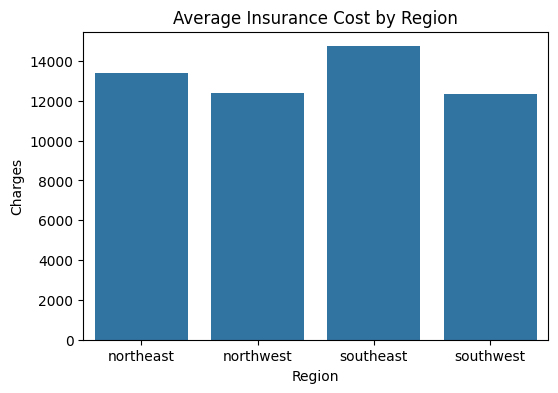

In [21]:
mean_charges = df.groupby('region')['charges'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='charges', data=mean_charges)
plt.title('Average Insurance Cost by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

### Auxiliary Analysis

##### Sex-Smoker

In [22]:
#create a contingency table
cross_table = pd.crosstab(df["sex"],df["smoker"])
cross_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [23]:
#convert a contingency table into proportions
proportions = pd.crosstab(df["sex"],df["smoker"]) / len(df)
proportions

smoker,no,yes
sex,,
female,0.408819,0.085949
male,0.386398,0.118834


In [24]:
#marginal proportions
print(proportions.sum(axis=0))

smoker
no     0.795217
yes    0.204783
dtype: float64


This means that 79.52% of all individuals are non-smokers and 20.48% are smokers. The smoking rate is quite low.

In [25]:
#marginal proportions
print(proportions.sum(axis=1))

sex
female    0.494768
male      0.505232
dtype: float64


Female: 49.48%

Male: 50.52%

This shows that the gender distribution is almost equal. Men and women are almost equally represented.

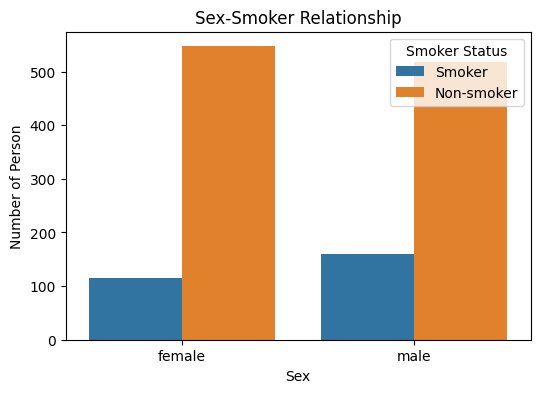

In [26]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='sex', hue='smoker', data=df) 
plt.title('Sex-Smoker Relationship') 
plt.xlabel('Sex') 
plt.ylabel('Number of Person') 
plt.legend(title='Smoker Status', loc='upper right', labels=['Smoker', 'Non-smoker']) 
plt.show()

##### Smoker-Region

In [27]:
cross_table = pd.crosstab(df["smoker"],df["region"])
cross_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [28]:
proportions = pd.crosstab(df["smoker"],df["region"]) / len(df)
proportions

region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.192078,0.199552,0.204036,0.199552
yes,0.050075,0.043348,0.068012,0.043348


In the Southeast region, both smoking and non-smoking rates are higher than in other regions. This may indicate that there is a marked difference in smoking in the region.

In the Northwest and Southwest regions, the proportions of smokers and non-smokers are equal, indicating that smoking is similar in these regions.

In the Northeast region, the proportion of non-smokers is slightly lower, while the proportion of smokers is higher than in other regions except Southeast.

In [29]:
proportions.sum(axis=0)

region
northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
dtype: float64

Balanced Distribution: The Northeast, Northwest and Southwest regions contain about 24% of the total population, indicating a fairly balanced distribution.

Southeast Region: It has a higher proportion of the population than the other regions at 27%. It should be noted that this region also has a high smoking rate.

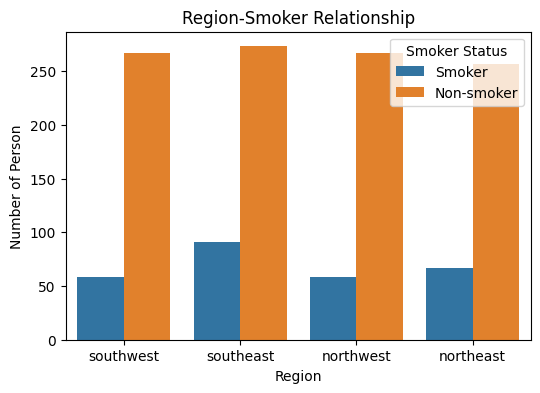

In [30]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='region', hue='smoker', data=df) 
plt.title('Region-Smoker Relationship') 
plt.xlabel('Region') 
plt.ylabel('Number of Person') 
plt.legend(title='Smoker Status', loc='upper right', labels=['Smoker', 'Non-smoker']) 
plt.show()

##### Age-Smoker

In [31]:
df.groupby("smoker")["age"].agg(["mean","median","min","max"]).reset_index()

,smoker,mean,median,min,max
0,no,39.385338,40.0,18,64
1,yes,38.514599,38.0,18,64


These data provide a clear picture of the age distribution of smokers and non-smokers. The slightly higher mean and median ages of non-smokers may indicate that non-smokers are slightly older. However, the age ranges of both groups remain the same.

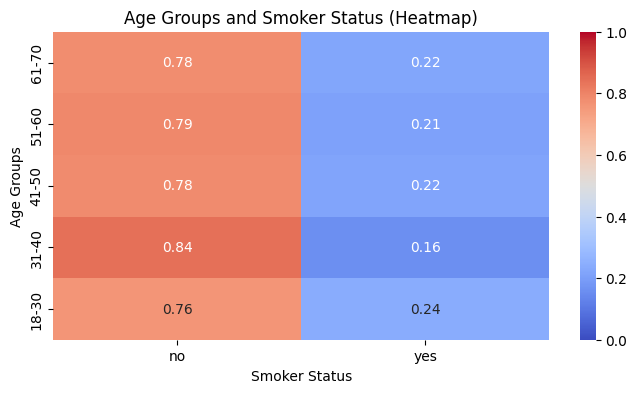

In [32]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70], labels=['61-70','51-60','41-50','31-40','18-30'])

cross_table = pd.crosstab(df['age_group'], df['smoker'], normalize='index')

plt.figure(figsize=(8, 4))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Age Groups and Smoker Status (Heatmap)')
plt.xlabel('Smoker Status')
plt.ylabel('Age Groups')
plt.show()

This heat map gives a clear picture of how smoking habits vary across age groups. It can be observed that smoking habits are more prevalent in younger age groups, but decline in middle age.

### Conclusion and Summary

My aim in conducting this analysis was to find the variable that affects insurance costs the most. According to my analyses, I found and visualized that the variable that affects insurance costs the most is smoking. The insurance costs of smokers are much higher than those of non-smokers.

I also observed that age, gender, number of children and region variables do not affect insurance costs as much as smoking status. In the auxiliary analysis section, I examined the relationships between gender and smoking, region and smoking, and age and smoking:

Gender-Smoking Status: I found that the majority are non-smokers and smokers have much higher insurance costs.

Region-Smoking Status: I found that smokers have higher insurance costs regardless of the region in which they live.

Age-Smoking Status: I observed that the use of cigarettes decreases in the middle-age group and that insurance costs change with it.

By conducting this analysis, I learned which variables have the greatest impact on insurance costs and how factors such as smoking affect insurance costs. Throughout the analysis process, I developed both data analysis techniques and data visualization methods.